In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("train/angry/Training_10118481.jpg")


In [4]:
img_array.shape

(48, 48, 3)

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

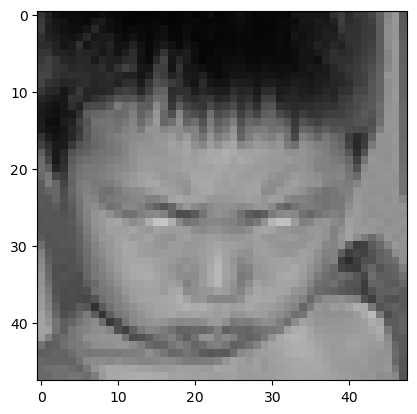

In [6]:
plt.imshow(img_array)

In [7]:
Datadirectory = "train/"

In [8]:
classes = ["angry","disgust","fear", "happy","neutral","sad","surprise"]

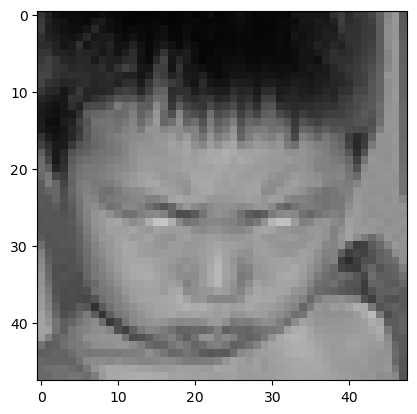

In [9]:
for category in classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

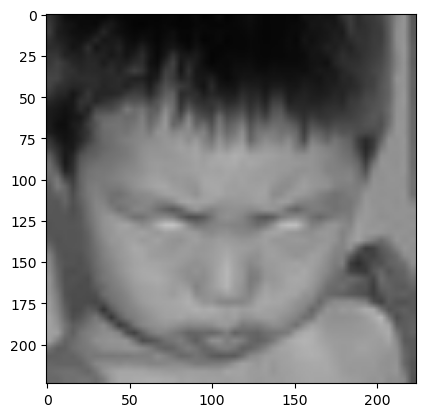

In [10]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

In [12]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(Datadirectory,category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        

In [13]:
create_training_data()

In [14]:
print(len(training_data))

15649


In [15]:
import random
random.shuffle(training_data)


In [16]:
x = [] #Data/Feature
y = [] #Label


for features,label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x, dtype='uint8').reshape(-1, img_size, img_size,3) #Converting it into 4 dimenshions
y = np.array(y, dtype='uint8')

In [17]:
x.shape

(15649, 224, 224, 3)

In [18]:
for i in range(0,15649):
    x[i] = x[i]/255

# Deep Learning Model For Training - Transfer Learning

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.MobileNetV2()  ## pre-trained model

In [21]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [22]:
base_input = model.layers[0].input

In [23]:
base_output = model.layers[-2].output

In [24]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [25]:
final_output = layers.Dense(128)(base_output) # Adding the new layer after the output of golbal pooling layer
final_ouput = layers.Activation('relu')(final_output)  #Activation Function
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput) #Total classes are 7, Classification layer

In [26]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [27]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [28]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [29]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
# new_model.fit(x,y, epochs=100) 

In [31]:
# new_model.save('Finall_model_95p07.h5')
# /content/drive/MyDrive/Colab Notebooks

In [32]:
new_model = tf.keras.models.load_model('Finall_model_95p07.h5')

In [33]:
frame = cv2.imread("ne.jpg")

In [34]:
frame.shape

(577, 800, 3)

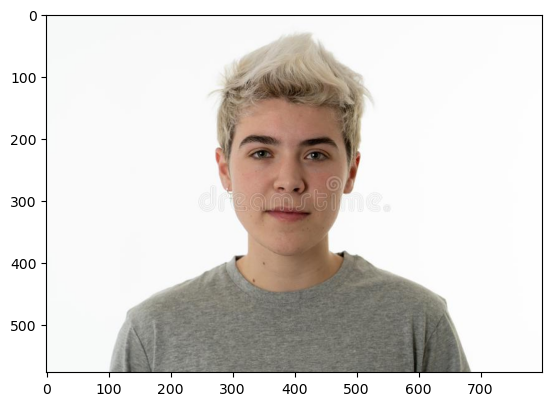

In [35]:

plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [36]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [37]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [38]:
gray.shape

(577, 800)

In [39]:
# Detect faces
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame,(x,y), (x+w, y+h),(0,255,0),2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(facess) == 0:
    print("Face not Detect")    
  else:
    for (ex,ey,ew,eh) in facess:
      face_roi = roi_color[ey: ey+eh, ex:ex+ew]



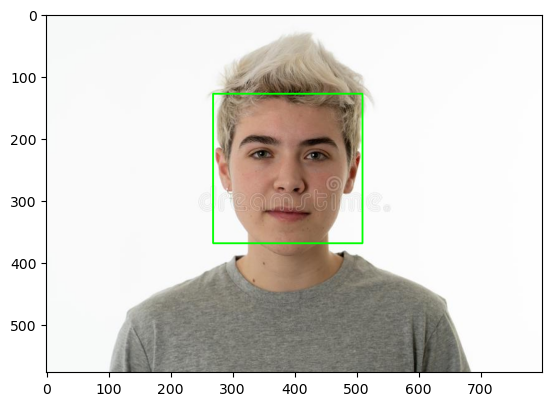

In [40]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

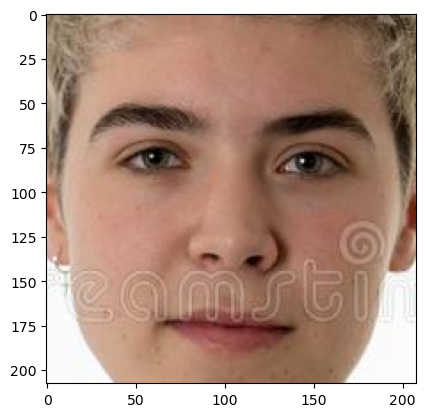

In [41]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [42]:
final_img = cv2.resize(face_roi, (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

In [43]:
predictions = new_model.predict(final_img)

1/1 [==============================] - 2s 2s/step


In [44]:
predictions[0]

array([0.3129574 , 0.05710908, 0.15198499, 0.07265001, 0.32778525,
       0.00911874, 0.0683945 ], dtype=float32)

In [45]:
np.argmax(predictions)

4

In [46]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)

img = np.zeros((500,500))

text = "some text in box!"

(text_width,text_height) = cv2.getTextSize(text,font,fontScale = font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25 

box_coords = ((text_offset_x,text_offset_y),(text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr,cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    
    raise IOError("Cannot open webcam")


while True:
    
    ret,frame = cap.read()
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for x,y,w,h in faces:
        
        roi_gray = gray[y:y+h, x:x+w]
        
        roi_color = frame[y:y+h, x:x+w]
        
        cv2.rectangle(frame,(x,y), (x+w, y+h), (255,0,0),2)
        
        facess = faceCascade.detectMultiScale(roi_gray)
        
        if len(facess) == 0:
            
            
            print("Face not Detected")
        
        else:
            
            for (ex,ey,ew,eh) in facess:
                
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
    
    final_image = cv2.resize(face_roi, (224,224))
    
    final_image = np.expand_dims(final_image,axis=0)
    
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(predictions)==0):
        
        status = "Angry"
        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame,status, (100,150), font, 3,(0,0,255),2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))

        


    elif(np.argmax(predictions)==1):
        
        status = "Disgust"
                
        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame,status, (100,150), font, 3,(0,0,255),2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    
    elif(np.argmax(predictions)==2):
        
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame,status, (100,150), font, 3,(0,0,255),2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    elif(np.argmax(predictions)==3):
        
        status = "Happy"
        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame,status, (100,150), font, 3,(0,0,255),2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    elif(np.argmax(predictions)==4):
        
        status = "Sad"
        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame,status, (100,150), font, 3,(0,0,255),2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif(np.argmax(predictions)==5):
        
        status = "Surprise"
        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame,status, (100,150), font, 3,(0,0,255),2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    else:
        
        status = "Neutral"
        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame,status, (100,150), font, 3,(0,0,255),2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
  
    cv2.imshow('Face Emotion Recognition',frame)
    if cv2.waitkey(2) & 0xFF == ord('q'):
        
        
        break

cap.release()
cv2.destroyAllWindows()





1/1 [==============================] - 0s 102ms/step


AttributeError: module 'cv2' has no attribute 'waitkey'